In [71]:
import py21cmfast as p21c
from py21cmfast import plotting
import os
import matplotlib.pyplot as plt
from py21cmfast import cache_tools
import numpy as np
import cv2

print(f"21cmFAST version is {p21c.__version__}")

21cmFAST version is 3.3.1


In [72]:
def clear_cache():
    cache_tools.clear_cache(direc="_cache")

#clear_cache()

In [73]:
box_len = 500#2000

In [74]:


lightcone = p21c.run_lightcone(
    redshift = 8.0, #6.0
    max_redshift = 13.0, #15.0
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":60.0}),
    user_params = {"HII_DIM":150, "BOX_LEN": box_len},
    lightcone_quantities=("brightness_temp", 'density'),
    global_quantities=("brightness_temp", 'density', 'xH_box'),
    direc='_cache'
)

/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remove array that isn't yet created: hires_vx
  warnings.warn(f"Trying to remove array that isn't yet created: {k}")
/Users/dmitryzenko/miniconda3/envs/cm21fast/lib/python3.11/site-packages/py21cmfast/_utils.py:815: UserWarning: Trying to remov

(<Figure size 524x475 with 2 Axes>,
 <Axes: xlabel='Redshift', ylabel='y-axis [Mpc]'>)

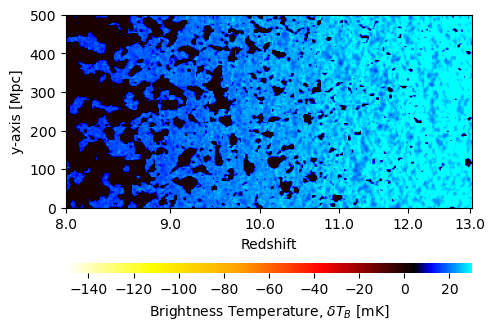

In [75]:
plotting.lightcone_sliceplot(lightcone)

In [76]:
np.shape(lightcone)

(150, 150, 316)

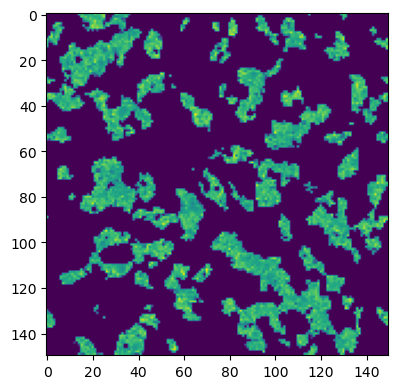

(150, 150)


In [77]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(111)
img1 = getattr(lightcone, 'brightness_temp')[:,:,0]
ax1.imshow(img1)
plt.show()

print(np.shape(img1))

# Comoving distance

In [78]:
dir(lightcone)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_prefix',
 '_input_rep',
 '_particular_rep',
 '_read_inputs',
 '_read_particular',
 '_write',
 '_write_particulars',
 'astro_params',
 'brightness_temp',
 'cache_files',
 'cell_size',
 'cosmo_params',
 'density',
 'flag_options',
 'gather',
 'get_cached_data',
 'get_unique_filename',
 'global_brightness_temp',
 'global_density',
 'global_params',
 'global_quantities',
 'global_xH',
 'global_xHI',
 'lightcone_coords',
 'lightcone_dimensions',
 'lightcone_distances',
 'lightcone_redshifts',
 'lightcones',
 'log10_mturnovers',
 'log10_mturnovers_mini',
 'n_slices',
 'node_redshifts',
 'photon_nonconserv

In [79]:
distances = getattr(lightcone, 'lightcone_distances')
redshifts = getattr(lightcone, 'lightcone_redshifts')

In [80]:
len(redshifts)

316

In [81]:
distances

array([ 9132.09022019,  9135.43413553,  9138.77805088,  9142.12196622,
        9145.46588156,  9148.80979691,  9152.15371225,  9155.4976276 ,
        9158.84154294,  9162.18545828,  9165.52937363,  9168.87328897,
        9172.21720431,  9175.56111966,  9178.905035  ,  9182.24895035,
        9185.59286569,  9188.93678103,  9192.28069638,  9195.62461172,
        9198.96852707,  9202.31244241,  9205.65635775,  9209.0002731 ,
        9212.34418844,  9215.68810379,  9219.03201913,  9222.37593447,
        9225.71984982,  9229.06376516,  9232.40768051,  9235.75159585,
        9239.09551119,  9242.43942654,  9245.78334188,  9249.12725722,
        9252.47117257,  9255.81508791,  9259.15900326,  9262.5029186 ,
        9265.84683394,  9269.19074929,  9272.53466463,  9275.87857998,
        9279.22249532,  9282.56641066,  9285.91032601,  9289.25424135,
        9292.5981567 ,  9295.94207204,  9299.28598738,  9302.62990273,
        9305.97381807,  9309.31773342,  9312.66164876,  9316.0055641 ,
      

In [82]:
redshifts

array([ 8.00000003,  8.01140559,  8.02283293,  8.03428187,  8.04575258,
        8.05724514,  8.06875949,  8.08029585,  8.09185416,  8.10343448,
        8.11503697,  8.12666154,  8.13830832,  8.1499774 ,  8.16166873,
        8.17338246,  8.18511868,  8.1968773 ,  8.2086586 ,  8.22046237,
        8.23228884,  8.24413807,  8.25601002,  8.26790485,  8.2798226 ,
        8.29176327,  8.30372697,  8.31571381,  8.3277237 ,  8.33975674,
        8.3518131 ,  8.3638928 ,  8.37599587,  8.38812237,  8.40027238,
        8.41244588,  8.42464309,  8.43686392,  8.44910848,  8.46137687,
        8.47366917,  8.48598535,  8.49832547,  8.51068978,  8.5230781 ,
        8.53549067,  8.54792741,  8.56038849,  8.57287394,  8.5853838 ,
        8.59791812,  8.61047707,  8.62306065,  8.63566893,  8.64830184,
        8.66095971,  8.6736424 ,  8.68635001,  8.69908274,  8.71184048,
        8.72462338,  8.7374315 ,  8.75026492,  8.76312365,  8.77600786,
        8.78891747,  8.8018527 ,  8.81481348,  8.82780006,  8.84

In [83]:
np.shape(redshifts) == np.shape(distances)

True

In [84]:
theta = np.arctan(1000/np.max(distances))
angle = 2 * (theta*180/np.pi) # check if looks sensible
angle

11.214603133829685

In [85]:
img_zmax = getattr(lightcone,'brightness_temp')[:,:,-1]

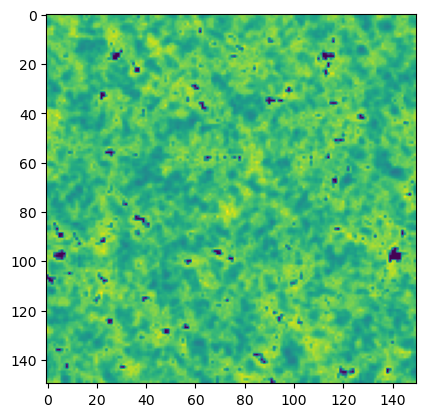

In [86]:
plt.imshow(img_zmax)

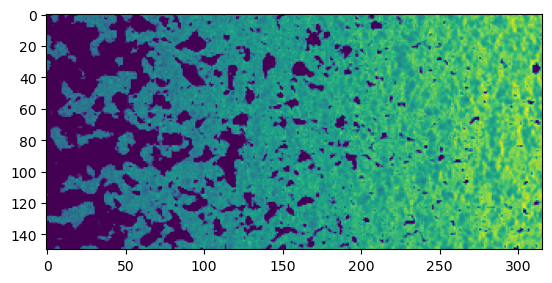

In [87]:
img_profile = getattr(lightcone,'brightness_temp')[0,:,:]
plt.imshow(img_profile)


In [88]:
rgb_shape = list(np.shape(img_profile))
rgb_shape.append(3)

rgb_img = np.zeros(rgb_shape)
rgb_img[:,:,-1] = img_profile
rgb_img = rgb_img/np.max(rgb_img)

In [89]:
np.max(rgb_img)

1.0

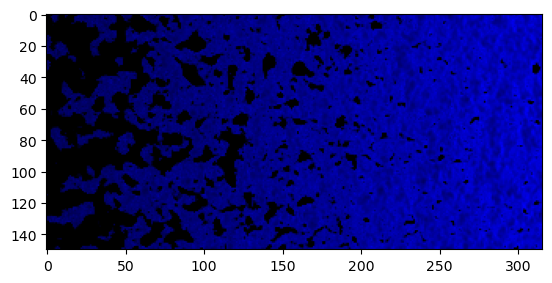

In [90]:
plt.imshow(rgb_img)

In [91]:
dist_max = np.max(distances)

theta = np.arctan((box_len/2)/dist_max)

test = np.copy(rgb_img)

for i in range(len(distances)):

    dist = distances[len(distances)-1-i]
    half_box_mpc = np.tan(theta)*dist
    half_box_pixels = int(((np.shape(img_profile)[0]/2)/(np.tan(theta)*dist_max))*half_box_mpc)
    
    pixels_from_edge = int(np.shape(img_profile)[0]/2-half_box_pixels)
    
    test[pixels_from_edge, len(distances)-1-i, -1] = 0 
    test[pixels_from_edge, len(distances)-1-i, 0] = 1.0 

    test[-pixels_from_edge, len(distances)-1-i, -1] = 0 
    test[-pixels_from_edge, len(distances)-1-i, 0] = 1.0 


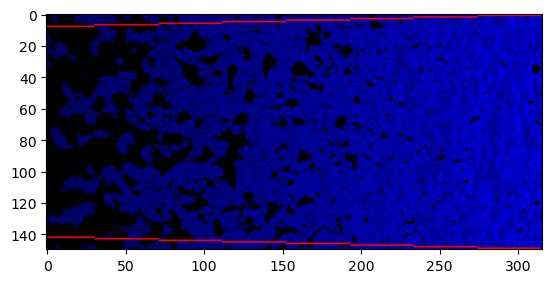

In [92]:
plt.imshow(test)

In [93]:
dist_max = np.max(distances)

theta = np.arctan((box_len/2)/dist_max)

simulation = getattr(lightcone,'brightness_temp')
img_zmax = simulation[:,:,-1]

frames = []

for i in range(len(distances)):

    dist = distances[len(distances)-1-i]
    half_box_mpc = np.tan(theta)*dist
    half_box_pixels = int(((np.shape(img_profile)[0]/2)/(np.tan(theta)*dist_max))*half_box_mpc)
    
    pixels_from_edge = int(np.shape(img_profile)[0]/2-half_box_pixels)
    
    if i==0:
        frame = np.copy(simulation[:,:,np.shape(img_profile)[1]-1-i])
    else:
        frame = np.copy(simulation[pixels_from_edge:-pixels_from_edge,
                                   pixels_from_edge:-pixels_from_edge,
                                   np.shape(img_profile)[1]-1-i])
        
        frame = cv2.resize(frame, (150, 150), interpolation=cv2.INTER_NEAREST)
        
    
    print(np.shape(frame))
    frames.append(frame)

(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(150, 150)

In [94]:
len(frames) == np.shape(simulation[:,0,:])[1]

True

Text(0.5, 1.0, 'simulation')

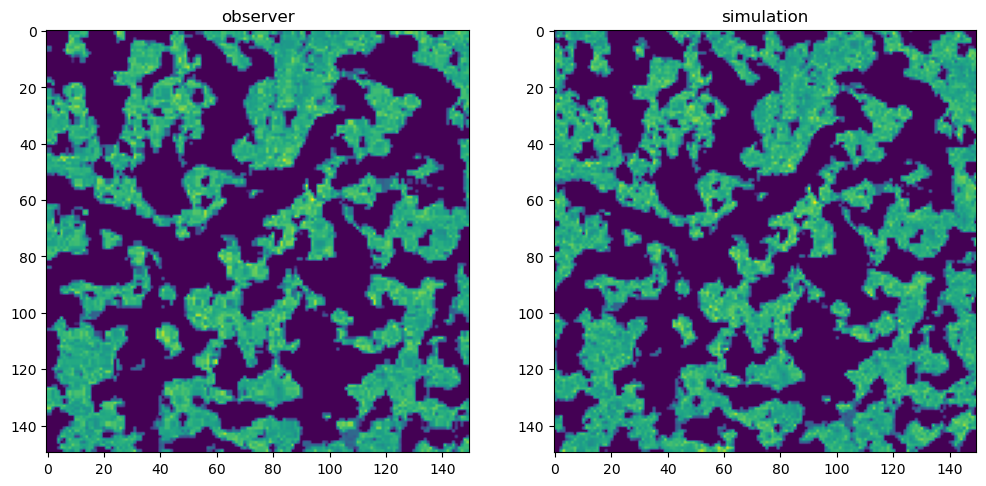

In [95]:
idx = -40

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(frames[idx])
#plt.xlabel('{}'.format(np.shape(frames[-1])))
plt.title('observer')
plt.subplot(122)
plt.imshow(simulation[:,:,-idx-1])
#plt.xlabel('{}'.format(np.shape(simulation[:,:,0])))
plt.title('simulation')



In [96]:
np.shape(getattr(lightcone, 'brightness_temp'))

(150, 150, 316)

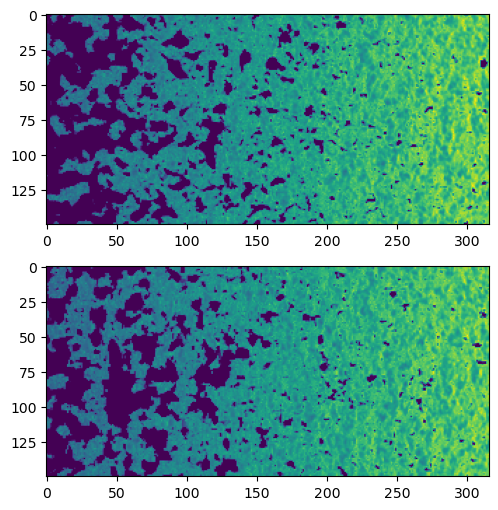

In [121]:

lightcone_observer = np.stack(np.copy(frames), axis=2)
lightcone_observer = np.flip(lightcone_observer, axis=2)

lightcone_simulation = getattr(lightcone, 'brightness_temp')

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(lightcone_simulation[0,:,:])
plt.subplot(212)
plt.imshow(lightcone_observer[0,:,:])
plt.show()